#Configuração do Kaggle

In [ ]:
! pip install -q kaggle

In [ ]:
#Montar sua unidade google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Criar um directório para armazenar o token do kaggle

In [ ]:
! mkdir ~/.kaggle

###Copiar o token do seu google drive para o seu ambiente de desenvolvimento, nesse caso, é o google colab.

In [ ]:
! cp /content/drive/MyDrive/KAGGLE_AUTH/kaggle.json ~/.kaggle

###Dar as permissões necessárias

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

##Carregar o dataset do Kaggle

In [ ]:
! kaggle datasets download shaistashaikh/carprice-assignment

Dataset URL: https://www.kaggle.com/datasets/shaistashaikh/carprice-assignment
License(s): unknown
  0% 0.00/6.07k [00:00<?, ?B/s]
100% 6.07k/6.07k [00:00<00:00, 12.5MB/s]


In [ ]:
! unzip /content/carprice-assignment.zip

Archive:  /content/carprice-assignment.zip
  inflating: CarPrice_Assignment.csv  


#Importar os módulos

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

#Ler os dados do nosso dataset

In [ ]:
df = pd.read_csv('/content/CarPrice_Assignment.csv')

#Data Check

In [ ]:
#Verificar se há dados nulos (dados em falta)
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

####Pela etapa anterior percebemos que não existem dados em falta. Note que todos atributos têm zero dados nulos.

In [ ]:
#Verificar duplicados. Linhas duplicadas são indesejadas no nosso dataset, pois têm os mesmos valores e isso significa que iríamos treinar o nosso modelo com mesmas entradas.
df.duplicated().sum()

0

####Uffa! Não temos dados duplicados.

In [ ]:
#Vamos conhecer os tipos de dados que temos. Isso pode nos ajudar a entede quais colunas apresentam dados categóricos e quais são numéricos
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

Pudemos notar que potencialmente os dados do tipo `object` são categóricos e que os restantes são numéricos (`float64`,`int64`)

In [ ]:
# O comando a seguir permite-nos ver quantos dados únicos temos por
# atributo/coluna
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [ ]:
#Vamos espreitar um pouco nos dados que temos no nosso dataset
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Os nomes dos carros são formados por `marca` e `modelo`. O nosso dataset tem apenas 205 linhas, e 147 nome de carros. Vamos reduzir essa variedade de carros considerando apenans a marca do carro. (Pode fazer o contrário para ver o resultado).

In [ ]:
#Esse comando vai considerar apenas a marca do carro
df['CarName'] = df['CarName'].apply(lambda x: x.split(' ')[0])
#o campo `car_ID` não tem nenhum impacto no nosso dataset, nesse caso, vamos remover
df.drop(['car_ID'],axis=1,inplace=True)
#Vamos ver alguns dados para confirmar se as alterações foram aplicadas
df.head(10)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,2,audi,gas,std,two,sedan,fwd,front,99.8,177.3,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,1,audi,gas,std,four,sedan,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,1,audi,gas,std,four,wagon,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,1,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,0,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


Com a informação anterior podemos

In [ ]:
categorical_cols = ['CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']


for column in categorical_cols:
  print(f"Categoria coluna {column} é: {df[column].unique()}")

Categoria coluna CarName é: ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']
Categoria coluna fueltype é: ['gas' 'diesel']
Categoria coluna aspiration é: ['std' 'turbo']
Categoria coluna doornumber é: ['two' 'four']
Categoria coluna carbody é: ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
Categoria coluna drivewheel é: ['rwd' 'fwd' '4wd']
Categoria coluna enginelocation é: ['front' 'rear']
Categoria coluna enginetype é: ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
Categoria coluna cylindernumber é: ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
Categoria coluna fuelsystem é: ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


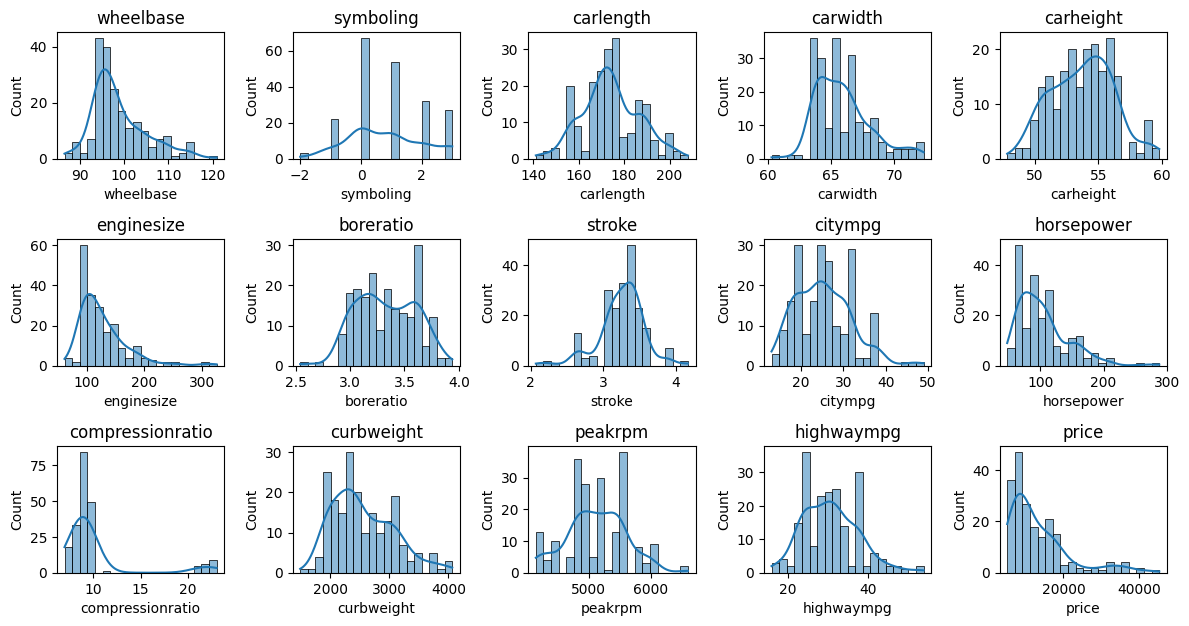

In [ ]:
numerical_cols = ['wheelbase','symboling','carlength','carwidth','carheight','enginesize','boreratio','stroke','citympg','horsepower','compressionratio','curbweight','peakrpm','highwaympg','price',]


plt.figure(figsize = (12,8))

for col in numerical_cols:
  plt.subplot(4,5,numerical_cols.index(col) + 1)
  sns.histplot(data=df[col],bins=20,kde=True)
  plt.title(col)
plt.tight_layout()
plt.show()

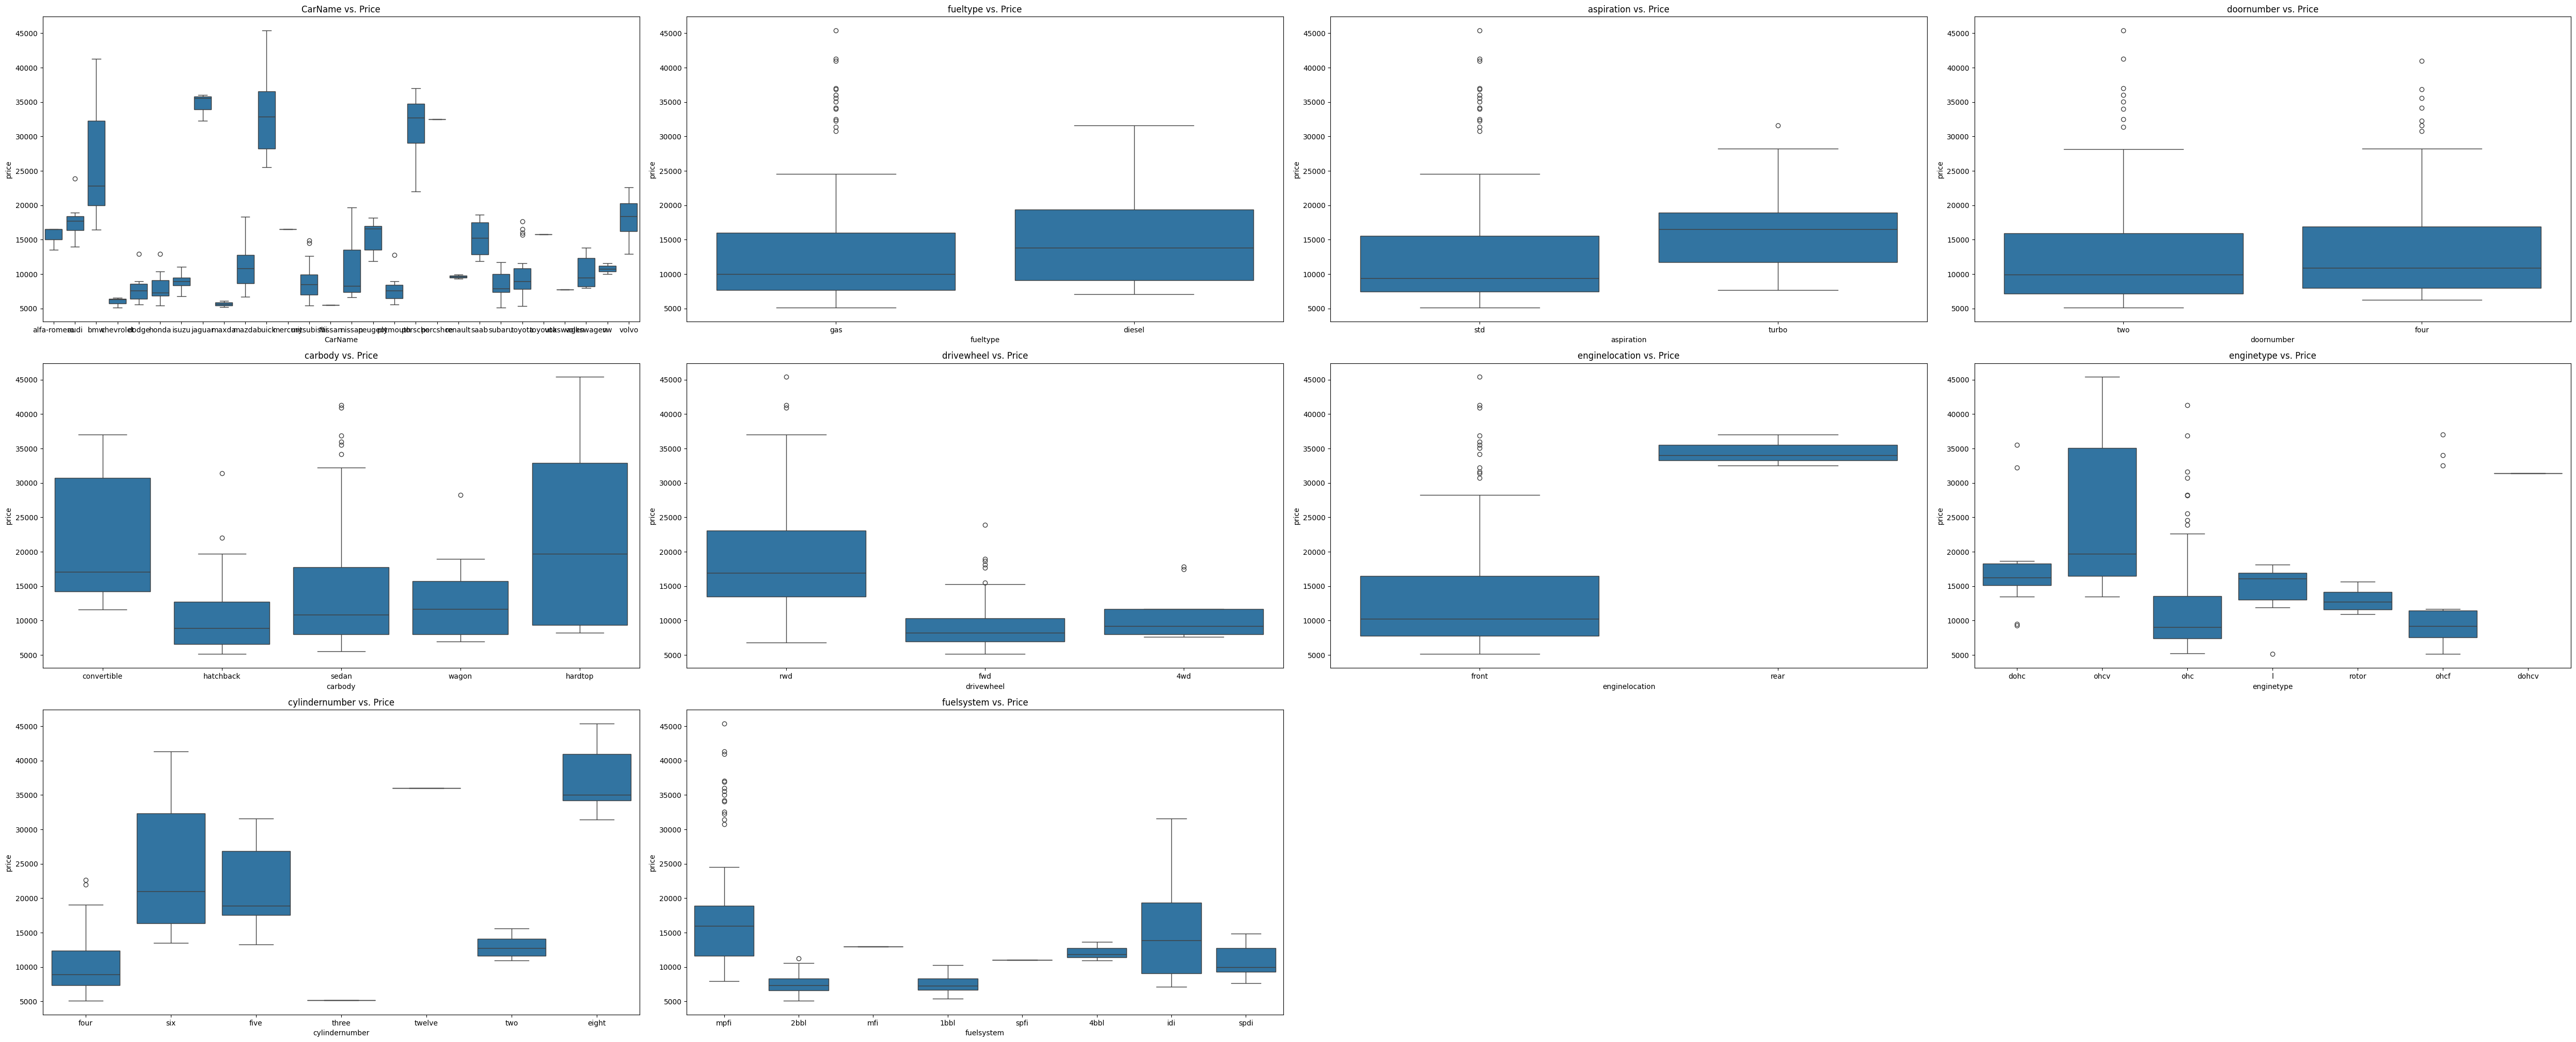

In [ ]:
#Uma boa análise que podemos fazer é analisar as variáveis categóricas em relação preço através de um boxplot

plt.figure(figsize=(50, 40))
for feature in categorical_cols:
    plt.subplot(6, 4, categorical_cols.index(feature) + 1)
    sns.boxplot(data=df, x=feature, y='price')
    plt.title(f'{feature} vs. Price')
plt.tight_layout()
plt.show()

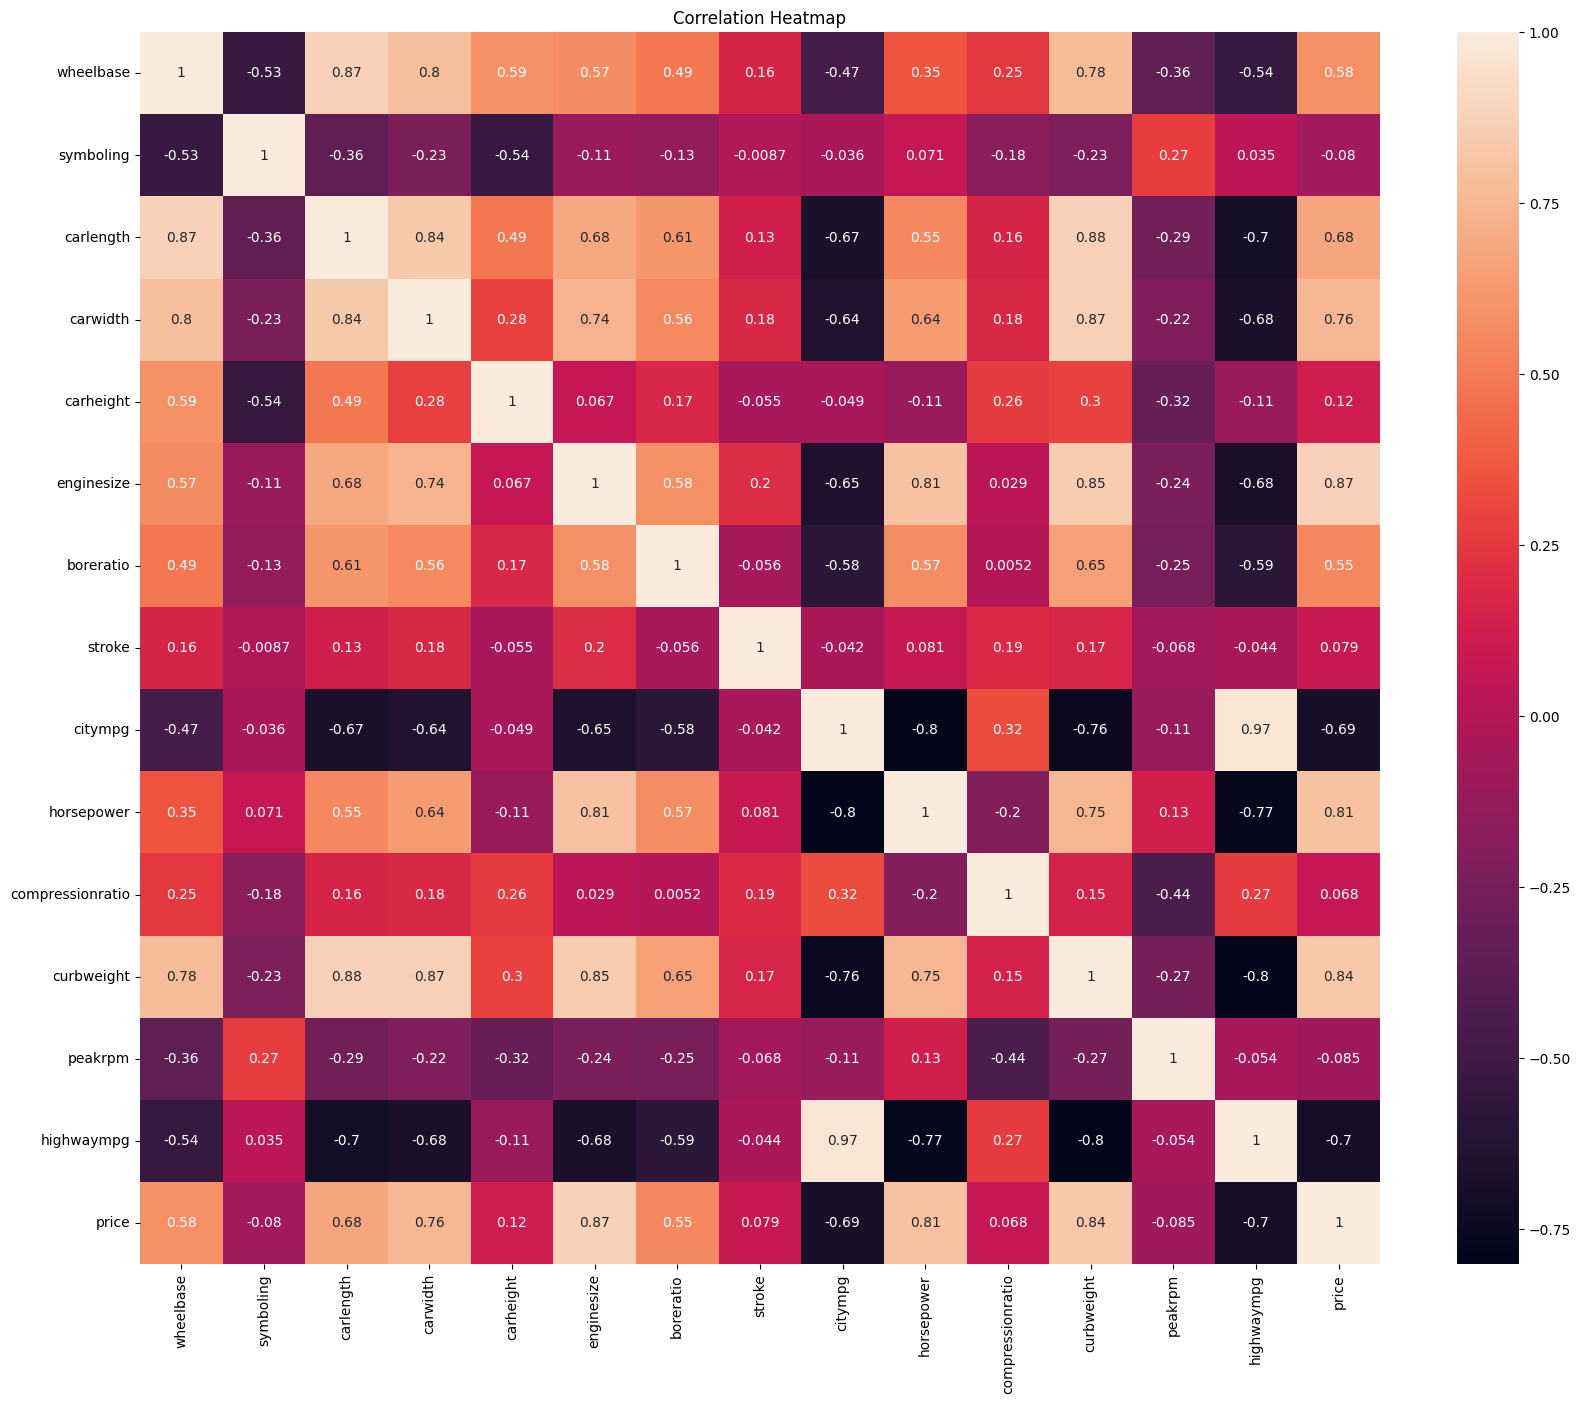

In [ ]:
#E por fim, pode analisar a correlação das variáveis indepentes em relação ao preço (variável dependente)
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Vamos transformar as variáveis categóricas em numéricas. Esse processo ajuda os computadores a treinar melhor o modelo, já que os computadores entendem melhor número mais do que palavras
label_encoder = LabelEncoder()
for column in categorical_cols:
    df[column] = label_encoder.fit_transform(df[column])

In [ ]:
# O processo a seguir tem uma justifivativa estatística: Basicamente vamos normalizar os dados das nossas colunas numéricas
scaler = StandardScaler()
numerical_cols_selected = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                     'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                     'peakrpm', 'citympg', 'highwaympg']

df[numerical_cols_selected] = scaler.fit_transform(df[numerical_cols_selected])

In [ ]:
# Feature engineering
df['power_to_weight_ratio'] = df['horsepower'] / df['curbweight']
for column in numerical_cols:
    df[f'{column}_squared'] = df[column] ** 2

#Treinamento

In [ ]:
# Separando o dataset
X = df.drop(['price', 'CarName'], axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Treinamento do modelo
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Predições
y_pred = model.predict(X_test)

In [ ]:
# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2_square = r2_score(y_test,y_pred)
print(f" R-squared: {r2_square}")
print(f'Mean Squared Error: {mse}')


 R-squared: 0.9787358202409262
Mean Squared Error: 1678679.8508891172


In [ ]:
pred_df=pd.DataFrame({'Valor real':y_test,'Valor predito':y_pred,'Diferença':y_test-y_pred})
pred_df

,Valor real,Valor predito,Diferença
15,30760.000,30324.189058,435.810942
9,17859.167,17583.348041,275.818959
100,9549.000,8852.642133,696.357867
132,11850.000,12455.724980,-605.724980
68,28248.000,28709.547138,-461.547138
95,7799.000,7097.429454,701.570546
159,7788.000,8926.194284,-1138.194284
162,9258.000,8537.124315,720.875685
147,10198.000,10535.324290,-337.324290
182,7775.000,8477.979887,-702.979887
